**Importing the necessary Libraries**

In [123]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from dateutil import parser


**Loading dataset and preprocessing**

In [124]:
df=pd.read_csv('lagos_weeather_data_2002_to_20241.csv')
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,Lagos,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,...,30.0,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5",NaN,NaN
8672,Lagos,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,...,30.0,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999",NaN,NaN
8673,Lagos,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,...,30.0,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote",NaN,NaN
8674,Lagos,2024-07-02,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,...,30.0,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",NaN,NaN


In [125]:
def parse_date(date_str):
    return parser.parse(date_str, dayfirst=True)

# Apply the parse_date function to each date
df['Datetime'] = df['datetime'].apply(parse_date)
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,Datetime
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,2002-01-01
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2002-02-01
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2002-03-01
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,2002-04-01
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2002-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,Lagos,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,...,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5",NaN,NaN,2024-06-29
8672,Lagos,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,...,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999",NaN,NaN,2024-06-30
8673,Lagos,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,...,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote",NaN,NaN,2024-01-07
8674,Lagos,2024-07-02,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,...,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",NaN,NaN,2024-02-07


In [126]:
print(df.isnull().sum())

name                   0
datetime               0
tempmax              591
tempmin              591
temp                 823
feelslikemax         591
feelslikemin         591
feelslike            823
dew                  823
humidity             823
precip               823
precipprob           823
precipcover            0
preciptype          4940
snow                4748
snowdepth           4753
windgust            2800
windspeed            598
winddir             1206
sealevelpressure    1012
cloudcover           823
visibility          1025
solarradiation      3288
solarenergy         3288
uvindex             3288
severerisk          7314
sunrise              366
sunset               366
moonphase            366
conditions          1179
description         1179
icon                1179
stations            1179
windspeedmax        8310
windspeedmin        8310
Datetime               0
dtype: int64


In [127]:
# Fill missing values in 'precip(rain)' column with 0
df['precip'].fillna(0, inplace=True)
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,Datetime
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,2002-01-01
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2002-02-01
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2002-03-01
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,2002-04-01
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2002-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,Lagos,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,...,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5",NaN,NaN,2024-06-29
8672,Lagos,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,...,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999",NaN,NaN,2024-06-30
8673,Lagos,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,...,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote",NaN,NaN,2024-01-07
8674,Lagos,2024-07-02,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,...,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",NaN,NaN,2024-02-07


In [128]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin', 'Datetime'],
      dtype='object')

In [129]:
df.drop(['name', 
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],axis='columns', inplace=True)

**EDA**

**Average rainfall**

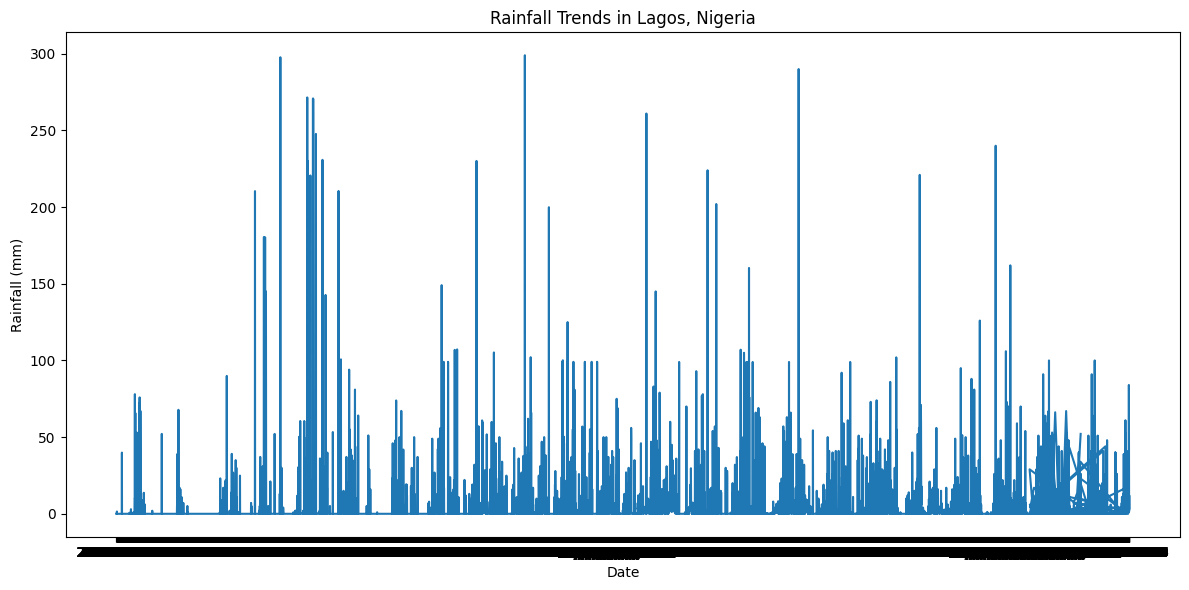

In [175]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['precip'])
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends in Lagos, Nigeria')
plt.tight_layout()
plt.show()

**Seasonality**

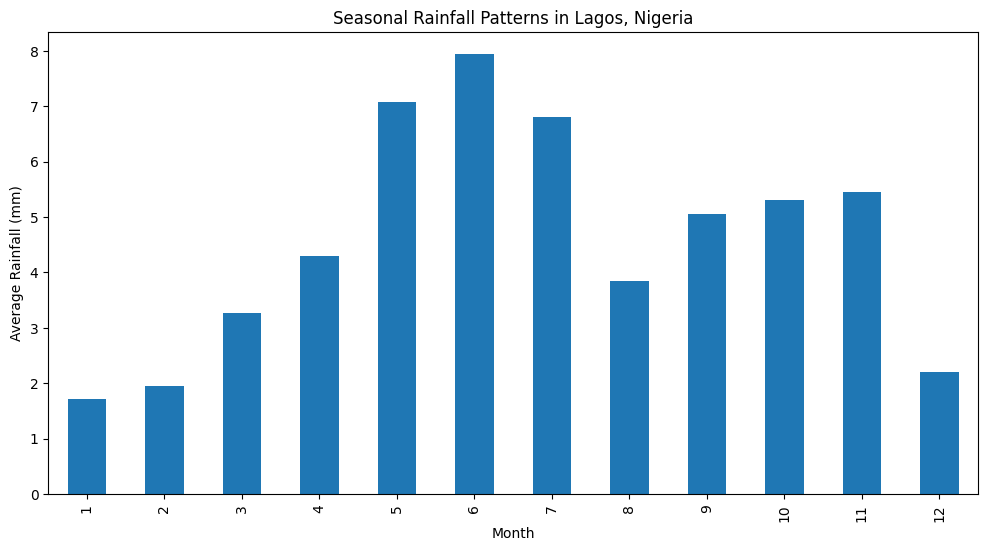

In [132]:
monthly_rainfall = df.groupby(df['Datetime'].dt.month)['precip'].mean()
plt.figure(figsize=(12, 6))
monthly_rainfall.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Seasonal Rainfall Patterns in Lagos, Nigeria')
plt.show()

**Visualize Rainfall Distributions**

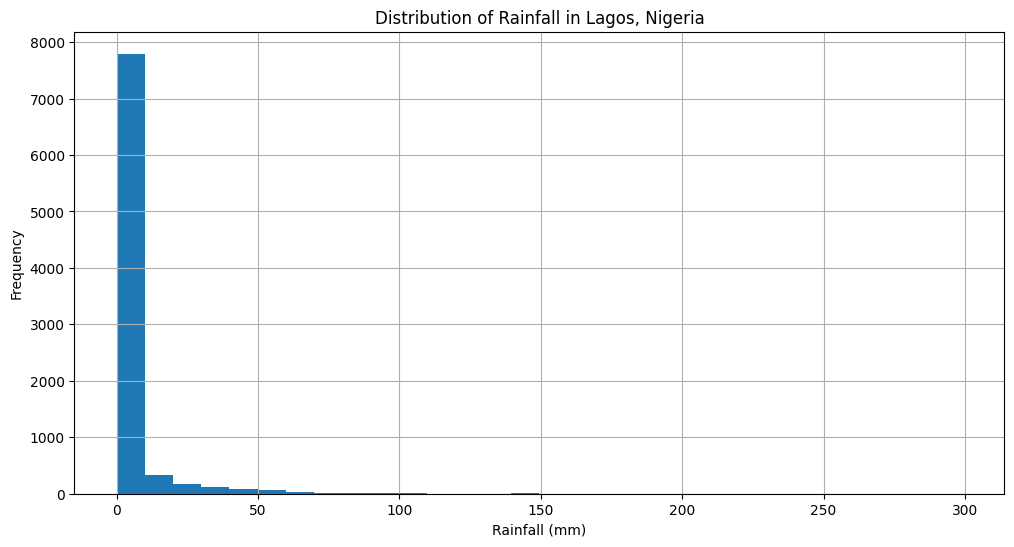

In [133]:
plt.figure(figsize=(12, 6))
df['precip'].hist(bins=30)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall in Lagos, Nigeria')
plt.show()

In [134]:
high_rainfall_days = df[df['precip'] > df['precip'].quantile(0.95)]
print(high_rainfall_days)

        datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
47    2002-02-17     28.6     26.1  27.8          33.9          26.1   
156   2002-06-06     28.1     21.1  23.8          32.8          21.1   
160   2002-06-10     30.1     23.1  25.6          36.5          23.1   
164   2002-06-14     26.1     23.7  24.5          26.1          23.7   
174   2002-06-24     26.1     23.4  25.1          26.1          23.4   
...          ...      ...      ...   ...           ...           ...   
8649  2024-06-07     31.2     24.0  27.1          38.2          24.0   
8663  2024-06-21     31.0     24.0  26.7          39.1          24.0   
8667  2024-06-25     27.5     23.9  25.5          32.5          23.9   
8668  2024-06-26     31.0     23.0  26.9          38.1          23.0   
8675  2024-07-03     27.1     24.0  25.4          29.9          24.0   

      feelslike   dew  humidity  precip  precipprob   Datetime  
47         31.7  24.7      83.4    39.9       100.0 2002-02-17  
156  

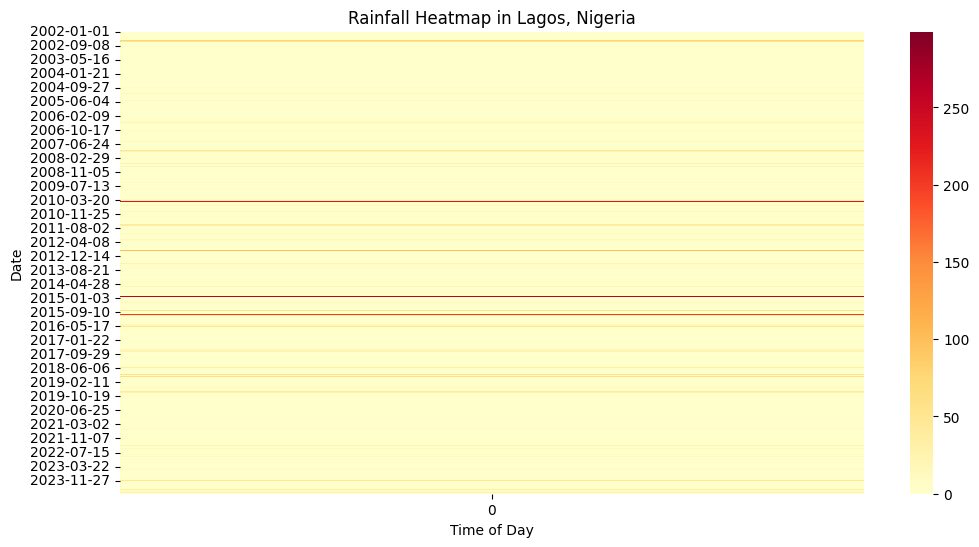

In [135]:
import seaborn as sns

# Create a pivot table of the rainfall data
df.set_index('Datetime', inplace=True)

# Create a pivot table of the rainfall data
rainfall_pivot = df.pivot_table(values='precip', index=df.index.date, columns=df.index.hour, aggfunc='mean')
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(rainfall_pivot, cmap='YlOrRd')
plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.title('Rainfall Heatmap in Lagos, Nigeria')
plt.show()

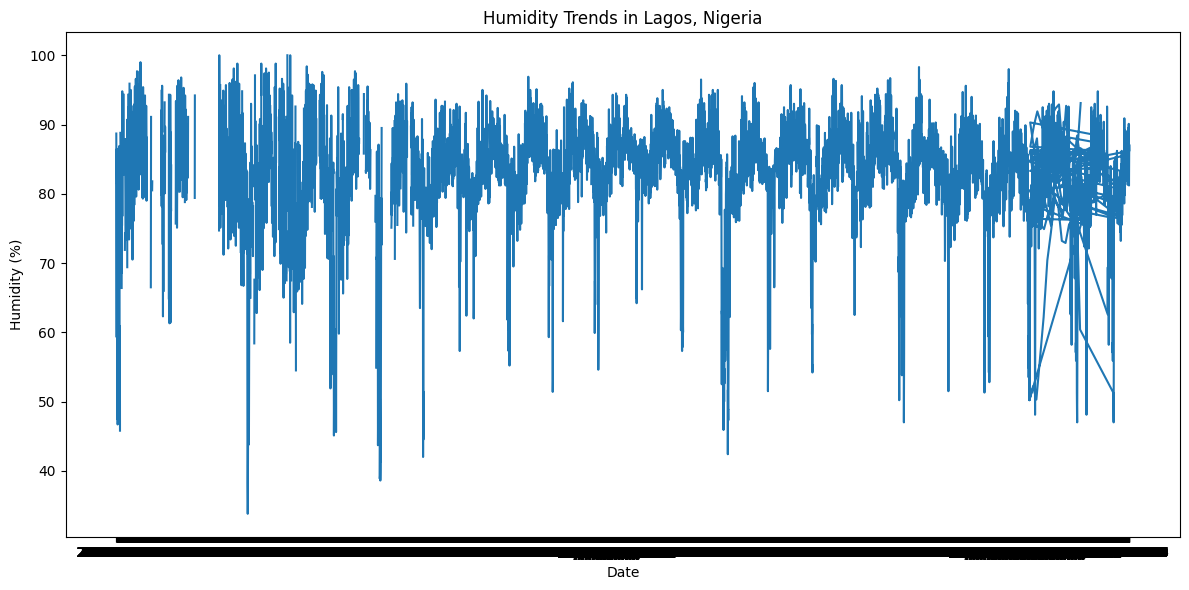

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Humidity Trends in Lagos, Nigeria')
plt.tight_layout()
plt.show()

**Flood risk detection**

In [137]:
def identify_high_rainfall_days(df, threshold=50):
    high_rainfall_days = df[df['precip'] > threshold]
    return high_rainfall_days
high_rainfall_days = identify_high_rainfall_days(df)
high_rainfall_days

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob
Datetime,,,,,,,,,,,
2002-06-06,2002-06-06,28.1,21.1,23.8,32.8,21.1,24.4,23.0,95.5,78.0,100.0
2002-10-06,2002-06-10,30.1,23.1,25.6,36.5,23.1,26.6,24.5,93.7,65.7,100.0
2002-06-24,2002-06-24,26.1,23.4,25.1,26.1,23.4,25.1,24.7,97.7,52.9,100.0
2002-12-07,2002-07-12,29.1,22.6,25.9,33.7,22.6,27.2,24.2,90.5,72.1,100.0
2002-07-16,2002-07-16,25.6,24.1,25.0,25.6,24.1,25.0,24.6,97.7,75.9,100.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11,2023-11-07,32.0,23.0,26.7,42.3,23.0,30.3,24.5,88.3,53.0,100.0
2024-05-22,2024-05-22,31.0,23.0,27.8,39.1,23.0,32.3,25.1,85.8,53.0,100.0
2024-05-25,2024-05-25,30.1,23.0,26.4,36.3,23.0,28.5,24.4,89.1,61.0,100.0


**Flood Prediction Model**

In [143]:
df.columns
df.dropna()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob
Datetime,,,,,,,,,,,
2002-01-01,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,0.0
2002-02-01,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,0.0
2002-03-01,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,0.0
2002-04-01,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,0.0
2002-05-01,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,12.0,100.0
2024-06-30,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,3.0,100.0
2024-01-07,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,6.9,100.0


In [172]:
from sklearn.model_selection import train_test_split
X=df.drop(['datetime'],axis='columns')
y=df.datetime

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [168]:
df.dropna()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob
Datetime,,,,,,,,,,,
2002-01-01,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,0.0
2002-02-01,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,0.0
2002-03-01,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,0.0
2002-04-01,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,0.0
2002-05-01,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,12.0,100.0
2024-06-30,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,3.0,100.0
2024-01-07,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,6.9,100.0


In [173]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Create an imputer for filling missing values
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.

# Create a pipeline that first imputes missing values then trains the model
pipeline = make_pipeline(imputer, LogisticRegression())

# Fit the model
pipeline.fit(X_train, y_train)


c:\Users\KHERLEELU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

**model evaluation**

In [174]:
y_pred = pipeline.predict(X_test)
pipeline.predict([[28.6	,25.6,	27.2,	33.8,	25.6,	30.7,	25.2,	88.7	,0.0,	0.0]])
pipeline.score(X_test,y_test)

c:\Users\KHERLEELU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


0.0

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = pipeline.predict(X_test)
# Assuming y_true and y_pred are the true and predicted labels from the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")  
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].